# Homework 3 - Nicholas Kemper

## Problem 1

In [4]:
# Import needed libraries
import matplotlib.pyplot as plt
import statistics as st
import random as rd
import numpy as np

In [5]:
cost = 50 #$/shirt
price = 75 #$/shirt
leftover_prc = 15  #$/shirt
leftover_amt = 5 #shirts

order_amt = 55 # shirts
order_hist = 50 # shirts

In [6]:
trials = 10000
sample = [] #empty list

for trial in range(trials):
    # Demand according to a poisson distribution
    demand = np.random.poisson(order_hist)
    # Check if demand is greater than the order amount
    # if it is greater, lucy can only sell what she bought
    if demand >= order_amt:
        orders = order_amt
        leftover = 0
    # If demand is less, Lucy can only sell what the demand is and
    # will have leftovers
    else:
        orders = demand
        leftover = orders - demand
    
    # Check if Lucy has greater than 5 leftover shirts
    # she can only sell up to 5 leftover shirts
    if leftover > leftover_amt:
        off_sales = leftover_amt
    else:
        off_sales = leftover
    # Final revenue calculation
    revenue = orders * price + off_sales * leftover_prc - cost * order_amt
    sample.append(revenue)

# Generate Propability Lucy will not make a profit
proportion = sum(1 for x in sample if x < 0) / len(sample)


(array([3.000e+00, 1.600e+01, 6.000e+01, 1.660e+02, 4.160e+02, 7.960e+02,
        1.228e+03, 1.615e+03, 1.657e+03, 4.043e+03]),
 array([-950. , -717.5, -485. , -252.5,  -20. ,  212.5,  445. ,  677.5,
         910. , 1142.5, 1375. ]),
 <BarContainer object of 10 artists>)

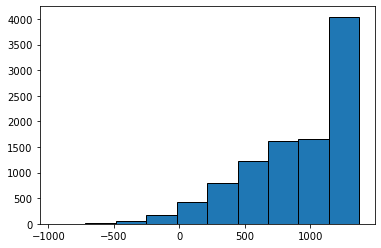

In [7]:
plt.hist(sample, edgecolor='k')

This histogram shows that the majority of the time, Lucy will sell out of shirts according to the poisson distribution. Since Lucy cannot order anymore shirts, the possible profit will max out. That is why there is a sharp peak in the histogram, this is Lucy's max profit with an order of 55 shirts.

In [8]:
print("Max - {}".format(max(sample)))
print("Median - {}".format(st.median(sample)))
print("Mean - {}".format(st.mean(sample)))
print("Min - {}".format(min(sample)))

Max - 1375
Median - 1000.0
Mean - 919.24
Min - -950


In [9]:
print("Propability Lucy will not make a profit - {}".format(proportion))

Propability Lucy will not make a profit - 0.0245


In [10]:
# Maximizing Profit, create a range of order quantites 
# from 30 to 80
order_amts = range(30,81)
mean_profit = []

In [11]:
# Loop over the different order quantites
for order_amt in order_amts:
    sample = [] #empty list

    for trial in range(trials):
        # Demand according to a poisson distribution
        demand = np.random.poisson(order_hist)
        # Check if demand is greater than the order amount
        # if it is greater, lucy can only sell what she bought
        if demand >= order_amt:
            orders = order_amt
            leftover = 0
        # If demand is less, Lucy can only sell what the demand is and
        # will have leftovers
        else:
            orders = demand
            leftover = orders - demand

        # Check if Lucy has greater than 5 leftover shirts
        # she can only sell up to 5 leftover shirts
        if leftover > leftover_amt:
            off_sales = leftover_amt
        else:
            off_sales = leftover
        # Final revenue calculation
        revenue = orders * price + off_sales * leftover_prc - cost * order_amt
        sample.append(revenue)

    # Take the mean profit from each order quantity
    prof_mean = st.mean(sample)
    mean_profit.append(prof_mean)
    

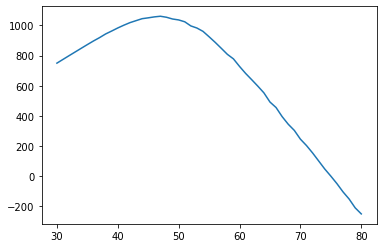

In [12]:
plt.plot(order_amts, mean_profit)

In [13]:
production = order_amts[mean_profit.index(max(mean_profit))]

In [14]:
print("The optimal order is {}".format(production))

The optimal order is 47


## Problem 2

In [15]:
# Setup
# Sales price ($)
min_sales = 18.95
max_sales = 26.95
mean_sales = 24.95

# Cost to make ($/phone)
cost_min = 12.00
cost_max = 15.00

# Fixed cost ($)
fixed_cost_mean = 30000
fixed_cost_sd = 5000

# Random demand (phones)
rd_demand_mean = 10
rd_demand_sd = 0

In [16]:
trials = 10000
sample = []

for trail in range(trials):
    # Get the sales price, follows a triangle distribution
    sales_price = rd.triangular(min_sales,max_sales,mean_sales)
    
    # Get the random demand, normal distrubution
    rd_demand =  rd.normalvariate(rd_demand_mean,rd_demand_sd)
        
    # Unit cost, follows a uniform distribution
    unit_cost = rd.uniform(cost_min,cost_max)
    
    # Get the cost price, follows a normal distribution
    fixed_price = rd.normalvariate(fixed_cost_mean,fixed_cost_sd)
    
    # Get the quantity sold according to the equation (phones)
    quantity_sold = 10000 - sales_price * 250 + rd_demand
    
    # Get the final revenue of the cell phones
    revenue = quantity_sold * (sales_price - unit_cost) - fixed_price
    
    # Add to the list
    sample.append(revenue)
    
# Generate Propability of incurring a loss
proportion = sum(1 for x in sample if x < 0) / len(sample)


(array([   5.,   38.,  234.,  778., 1882., 2826., 2558., 1302.,  333.,
          44.]),
 array([-18405.03213133, -13277.51321693,  -8149.99430252,  -3022.47538811,
          2105.0435263 ,   7232.56244071,  12360.08135512,  17487.60026953,
         22615.11918394,  27742.63809835,  32870.15701276]),
 <BarContainer object of 10 artists>)

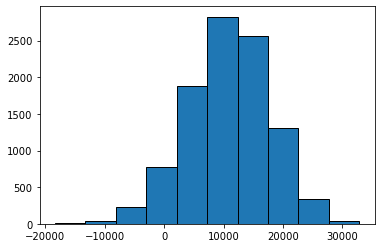

In [17]:
plt.hist(sample, edgecolor='k')

In [18]:
print("Max - {}".format(max(sample)))
print("Median - {}".format(st.median(sample)))
print("Mean - {}".format(st.mean(sample)))
print("Min - {}".format(min(sample)))

Max - 32870.15701275568
Median - 11046.835713293549
Mean - 10824.769696296333
Min - -18405.03213133414


The resulting histogram is normally distributed, with the most likely profit being around $10,500. The histogram's tail does extend below 0, indicating there is a chance to inncur a loss.

In [20]:
print("Propability of occuring a loss - {}%".format(proportion*100))

Propability of occuring a loss - 6.329999999999999%
